# Fake News Classifier Using LSTM

Dataset: https://github.com/FakeNewsChallenge/fnc-1


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


## Preparación dataset

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
#print(torch.cuda.get_device_name(0))
#torch.cuda.empty_cache()

0

###Creación del Modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModelo():
  K.clear_session( )
  model=Sequential( )
  #model.add(Dense(64,,activation='relu'))
  model.add(LSTM(100,input_shape=(1,20000)))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModeloDropout():
  K.clear_session( )
  model=Sequential( )
  model.add(LSTM(50,input_shape=(1,20000)))
  model.add(Dropout(0.2))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())

### Modelo 1


In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp2.pt')

CPU times: user 2.28 s, sys: 3.48 s, total: 5.77 s
Wall time: 24 s
CPU times: user 468 ms, sys: 1.46 s, total: 1.92 s
Wall time: 20.3 s
CPU times: user 437 ms, sys: 1.44 s, total: 1.87 s
Wall time: 23.2 s
CPU times: user 4.22 ms, sys: 3.15 ms, total: 7.37 ms
Wall time: 522 ms
CPU times: user 4.87 ms, sys: 0 ns, total: 4.87 ms
Wall time: 209 ms
CPU times: user 3.66 ms, sys: 235 µs, total: 3.89 ms
Wall time: 266 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from tensorflow.keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModelo()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 28s 7ms/step - loss: 0.4919 - categorical_accuracy: 0.7490
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.1707 - categorical_accuracy: 0.9357
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.1154 - categorical_accuracy: 0.9583
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0898 - categorical_accuracy: 0.9673
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0750 - categorical_accuracy: 0.9736
Epoch 6/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0612 - categorical_accuracy: 0.9779
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0480 - categorical_accuracy: 0.9827
Epoch 8/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0411 - categorical_accuracy: 0.9864
Epoch 9/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0410 - categorical_accuracy

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 6s 7ms/step - loss: 0.4994 - categorical_accuracy: 0.8914
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1639 - categorical_accuracy: 0.9414
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.1275 - categorical_accuracy: 0.9531
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.0995 - categorical_accuracy: 0.9645
Epoch 5/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0751 - categorical_accuracy: 0.9733
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.0536 - categorical_accuracy: 0.9816
Epoch 7/20
782/782 [==============================] - 6s 7ms/step - loss: 0.0369 - categorical_accuracy: 0.9893
Epoch 8/20
782/782 [==============================] - 5s 7ms/step - loss: 0.0238 - categorical_accuracy: 0.9935
Epoch 9/20
782/782 [==============================] - 5s 7ms/step - loss: 0.0149 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
737/737 [==============================] - 5s 7ms/step - loss: 0.4156 - categorical_accuracy: 0.9148
Epoch 2/20
737/737 [==============================] - 5s 7ms/step - loss: 0.1274 - categorical_accuracy: 0.9594
Epoch 3/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0916 - categorical_accuracy: 0.9706
Epoch 4/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0673 - categorical_accuracy: 0.9790
Epoch 5/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0474 - categorical_accuracy: 0.9860
Epoch 6/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0311 - categorical_accuracy: 0.9917
Epoch 7/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0189 - categorical_accuracy: 0.9952
Epoch 8/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0107 - categorical_accuracy: 0.9978
Epoch 9/20
737/737 [==============================] - 5s 7ms/step - loss: 0.0058 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMTrain.h5')

### eval

In [4]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMTrain.h5')

In [5]:
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp2.pt',map_location=torch.device('cpu'))
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 79.6 ms, sys: 470 ms, total: 550 ms
Wall time: 13.6 s
CPU times: user 70.4 ms, sys: 470 ms, total: 541 ms
Wall time: 15.1 s
CPU times: user 97.8 ms, sys: 600 ms, total: 698 ms
Wall time: 13 s
CPU times: user 9.87 ms, sys: 1.13 ms, total: 11 ms
Wall time: 2.01 s
CPU times: user 6.29 ms, sys: 1.07 ms, total: 7.36 ms
Wall time: 915 ms
CPU times: user 6.3 ms, sys: 937 µs, total: 7.24 ms
Wall time: 1.01 s
CPU times: user 88.6 ms, sys: 1.06 s, total: 1.15 s
Wall time: 19 s
CPU times: user 133 ms, sys: 1.09 s, total: 1.22 s
Wall time: 26.5 s
CPU times: user 64.8 ms, sys: 1.16 s, total: 1.22 s
Wall time: 18.5 s
CPU times: user 7.67 ms, sys: 2.41 ms, total: 10.1 ms
Wall time: 1.97 s
CPU times: user 7.18 ms, sys: 308 µs, total: 7.49 ms
Wall time: 967 ms
CPU times: user 3.42 ms, sys: 2.51 ms, total: 5.93 ms
Wall time: 964 ms


In [6]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [7]:
from tensorflow.keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [ ]:
modelo1

In [8]:
#validacion
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 13s - loss: 0.7406 - categorical_accuracy: 0.9145 - 13s/epoch - 28ms/step
469/469 - 8s - loss: 0.6736 - categorical_accuracy: 0.9196 - 8s/epoch - 17ms/step
471/471 - 8s - loss: 0.7210 - categorical_accuracy: 0.9146 - 8s/epoch - 17ms/step


[0.7210360765457153, 0.9146389961242676]

In [9]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMEvaluate.h5')

986/986 - 3s
31529
acc: 0.9188683434298582
precision: 0.916822683350864
recall: 0.9152032133020207
f1: 0.9188683434298582


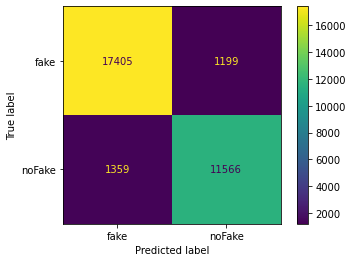

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


### Modelo 2


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp2.pt')

CPU times: user 1.74 s, sys: 1.89 s, total: 3.63 s
Wall time: 27.7 s


Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from tensorflow.keras.utils import to_categorical


y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModelo()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 27s 9ms/step - loss: 0.4899 - categorical_accuracy: 0.7495
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1680 - categorical_accuracy: 0.9364
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1086 - categorical_accuracy: 0.9629
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0877 - categorical_accuracy: 0.9693
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0717 - categorical_accuracy: 0.9764
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0586 - categorical_accuracy: 0.9791
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0515 - categorical_accuracy: 0.9804
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0447 - categorical_accuracy: 0.9846
Epoch 9/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0368 - categorical_accuracy

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 0.4614 - categorical_accuracy: 0.8904
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1642 - categorical_accuracy: 0.9403
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1274 - categorical_accuracy: 0.9527
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0979 - categorical_accuracy: 0.9645
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0726 - categorical_accuracy: 0.9744
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0513 - categorical_accuracy: 0.9830
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0343 - categorical_accuracy: 0.9886
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0221 - categorical_accuracy: 0.9938
Epoch 9/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0132 - categorical_accuracy:

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
737/737 [==============================] - 6s 9ms/step - loss: 0.4497 - categorical_accuracy: 0.9105
Epoch 2/20
737/737 [==============================] - 6s 9ms/step - loss: 0.1311 - categorical_accuracy: 0.9548
Epoch 3/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0925 - categorical_accuracy: 0.9683
Epoch 4/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0676 - categorical_accuracy: 0.9779
Epoch 5/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0473 - categorical_accuracy: 0.9858
Epoch 6/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0313 - categorical_accuracy: 0.9916
Epoch 7/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0196 - categorical_accuracy: 0.9956
Epoch 8/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0119 - categorical_accuracy: 0.9976
Epoch 9/20
737/737 [==============================] - 6s 9ms/step - loss: 0.0071 - categorical_accuracy:

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMTrain.h5')

In [4]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMTrain.h5')

In [5]:
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt',map_location=torch.device('cpu'))
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 81.1 ms, sys: 678 ms, total: 759 ms
Wall time: 18.5 s
CPU times: user 69.9 ms, sys: 723 ms, total: 793 ms
Wall time: 12.9 s
CPU times: user 90.4 ms, sys: 801 ms, total: 892 ms
Wall time: 14.3 s
CPU times: user 10.1 ms, sys: 1.34 ms, total: 11.5 ms
Wall time: 1.97 s
CPU times: user 4.14 ms, sys: 1.26 ms, total: 5.41 ms
Wall time: 899 ms
CPU times: user 6.43 ms, sys: 294 µs, total: 6.72 ms
Wall time: 1.09 s
CPU times: user 52.9 ms, sys: 1.13 s, total: 1.18 s
Wall time: 14.6 s
CPU times: user 68.7 ms, sys: 1.13 s, total: 1.2 s
Wall time: 18 s
CPU times: user 75.2 ms, sys: 1.2 s, total: 1.27 s
Wall time: 13.3 s
CPU times: user 9.89 ms, sys: 671 µs, total: 10.6 ms
Wall time: 2.06 s
CPU times: user 4.98 ms, sys: 2 ms, total: 6.98 ms
Wall time: 1.02 s
CPU times: user 7.47 ms, sys: 57 µs, total: 7.53 ms
Wall time: 905 ms


In [6]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [8]:
from tensorflow.keras.utils import to_categorical

y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [9]:
#validacion
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 3s - loss: 0.7864 - categorical_accuracy: 0.9125 - 3s/epoch - 7ms/step
469/469 - 2s - loss: 0.7532 - categorical_accuracy: 0.9169 - 2s/epoch - 4ms/step
471/471 - 2s - loss: 0.7085 - categorical_accuracy: 0.9190 - 2s/epoch - 4ms/step


[0.7084715962409973, 0.9190267324447632]

In [10]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMEvaluate.h5')

986/986 - 3s
31529
acc: 0.916584731517016
precision: 0.9137877318452761
recall: 0.9137877318452761
f1: 0.916584731517016


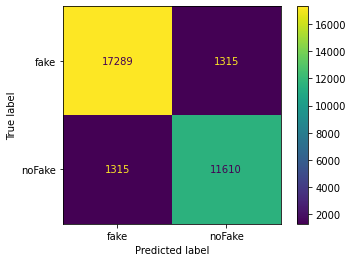

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


### Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp2.pt')

CPU times: user 2.2 s, sys: 3.36 s, total: 5.56 s
Wall time: 13.7 s
CPU times: user 457 ms, sys: 1.39 s, total: 1.85 s
Wall time: 20.8 s
CPU times: user 442 ms, sys: 1.42 s, total: 1.86 s
Wall time: 22.5 s
CPU times: user 14.1 ms, sys: 3.28 ms, total: 17.3 ms
Wall time: 2.45 s
CPU times: user 3.8 ms, sys: 626 µs, total: 4.42 ms
Wall time: 287 ms
CPU times: user 2.5 ms, sys: 787 µs, total: 3.29 ms
Wall time: 138 ms


Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from tensorflow.keras.utils import to_categorical


y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModelo()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 29s 9ms/step - loss: 0.4904 - categorical_accuracy: 0.7496
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1654 - categorical_accuracy: 0.9372
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1116 - categorical_accuracy: 0.9596
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0880 - categorical_accuracy: 0.9677
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0733 - categorical_accuracy: 0.9740
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0552 - categorical_accuracy: 0.9808
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0532 - categorical_accuracy: 0.9803
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0416 - categorical_accuracy: 0.9859
Epoch 9/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0389 - categorical_accuracy

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 0.4509 - categorical_accuracy: 0.8931
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1567 - categorical_accuracy: 0.9439
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 0.1208 - categorical_accuracy: 0.9562
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0925 - categorical_accuracy: 0.9673
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0687 - categorical_accuracy: 0.9764
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0489 - categorical_accuracy: 0.9834
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0335 - categorical_accuracy: 0.9902
Epoch 8/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0221 - categorical_accuracy: 0.9937
Epoch 9/20
782/782 [==============================] - 7s 9ms/step - loss: 0.0140 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
737/737 [==============================] - 7s 9ms/step - loss: 0.4247 - categorical_accuracy: 0.9165
Epoch 2/20
737/737 [==============================] - 7s 9ms/step - loss: 0.1282 - categorical_accuracy: 0.9577
Epoch 3/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0911 - categorical_accuracy: 0.9718
Epoch 4/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0664 - categorical_accuracy: 0.9795
Epoch 5/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0468 - categorical_accuracy: 0.9873
Epoch 6/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0309 - categorical_accuracy: 0.9923
Epoch 7/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0190 - categorical_accuracy: 0.9958
Epoch 8/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0112 - categorical_accuracy: 0.9975
Epoch 9/20
737/737 [==============================] - 7s 9ms/step - loss: 0.0061 - categorical_accuracy:

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMTrain.h5')

In [11]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMTrain.h5')

In [12]:
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt',map_location=torch.device('cpu'))
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 74.4 ms, sys: 725 ms, total: 800 ms
Wall time: 13.2 s
CPU times: user 59.2 ms, sys: 738 ms, total: 797 ms
Wall time: 12 s
CPU times: user 58.2 ms, sys: 911 ms, total: 969 ms
Wall time: 15 s
CPU times: user 5.66 ms, sys: 2.92 ms, total: 8.58 ms
Wall time: 1.53 s
CPU times: user 5.23 ms, sys: 1.67 ms, total: 6.9 ms
Wall time: 1.01 s
CPU times: user 4.68 ms, sys: 1.4 ms, total: 6.08 ms
Wall time: 949 ms
CPU times: user 98.8 ms, sys: 1.12 s, total: 1.22 s
Wall time: 18.4 s
CPU times: user 81.6 ms, sys: 1.09 s, total: 1.18 s
Wall time: 18.3 s
CPU times: user 69.9 ms, sys: 1.18 s, total: 1.25 s
Wall time: 18.1 s
CPU times: user 7.24 ms, sys: 1.88 ms, total: 9.12 ms
Wall time: 1.48 s
CPU times: user 4.02 ms, sys: 2.32 ms, total: 6.33 ms
Wall time: 990 ms
CPU times: user 5.32 ms, sys: 719 µs, total: 6.04 ms
Wall time: 950 ms


In [13]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [14]:
from tensorflow.keras.utils import to_categorical

y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [15]:
#validacion
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 2s - loss: 0.6723 - categorical_accuracy: 0.9177 - 2s/epoch - 5ms/step
469/469 - 2s - loss: 0.7388 - categorical_accuracy: 0.9173 - 2s/epoch - 5ms/step
471/471 - 2s - loss: 0.7206 - categorical_accuracy: 0.9159 - 2s/epoch - 4ms/step


[0.7205995321273804, 0.9159021377563477]

In [16]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMEvaluate.h5')

986/986 - 3s
31529
acc: 0.9175996701449459
precision: 0.9147519343929991
recall: 0.9149665989760318
f1: 0.9175996701449459


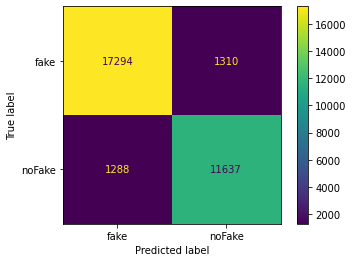

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')



### Model Training

### Performance Metrics And Accuracy

Modelos con dropout

In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_train/y1_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModeloDropout()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp2.pt',map_location=torch.device('cpu'))
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [ ]:
modelo1

In [ ]:
#validacion
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModeloDropout()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModeloDropout()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')



## Modelo1

In [4]:
from keras.models import load_model
modelo1 = load_model('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMEvaluate.h5')

In [5]:
%time X1_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  del X1_testp1
  del X1_testp2
  del X1_testp3
  del y1_testp1
  del y1_testp2
  del y1_testp3

CPU times: user 1.45 s, sys: 713 ms, total: 2.16 s
Wall time: 4.77 s
CPU times: user 272 ms, sys: 406 ms, total: 678 ms
Wall time: 3.29 s
CPU times: user 293 ms, sys: 782 ms, total: 1.08 s
Wall time: 3.8 s
CPU times: user 1.28 ms, sys: 1.16 ms, total: 2.44 ms
Wall time: 6.4 ms
CPU times: user 1.07 ms, sys: 531 µs, total: 1.6 ms
Wall time: 1.82 ms
CPU times: user 1.66 ms, sys: 0 ns, total: 1.66 ms
Wall time: 4.35 ms


In [6]:
%time X2_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  del X2_testp1
  del X2_testp2
  del X2_testp3
  del y2_testp1
  del y2_testp2
  del y2_testp3

CPU times: user 248 ms, sys: 423 ms, total: 671 ms
Wall time: 3.29 s
CPU times: user 256 ms, sys: 429 ms, total: 686 ms
Wall time: 3.29 s
CPU times: user 282 ms, sys: 551 ms, total: 833 ms
Wall time: 3.8 s
CPU times: user 2.82 ms, sys: 0 ns, total: 2.82 ms
Wall time: 5.54 ms
CPU times: user 1.54 ms, sys: 329 µs, total: 1.86 ms
Wall time: 2.03 ms
CPU times: user 1.55 ms, sys: 0 ns, total: 1.55 ms
Wall time: 1.72 ms


In [7]:
%time X3_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  del X3_testp1
  del X3_testp2
  del X3_testp3
  del y3_testp1
  del y3_testp2
  del y3_testp3

CPU times: user 228 ms, sys: 445 ms, total: 673 ms
Wall time: 3.29 s
CPU times: user 230 ms, sys: 442 ms, total: 672 ms
Wall time: 3.27 s
CPU times: user 322 ms, sys: 672 ms, total: 994 ms
Wall time: 3.85 s
CPU times: user 1.88 ms, sys: 876 µs, total: 2.76 ms
Wall time: 4.97 ms
CPU times: user 711 µs, sys: 1.53 ms, total: 2.24 ms
Wall time: 4.92 ms
CPU times: user 1.19 ms, sys: 42 µs, total: 1.23 ms
Wall time: 4.04 ms


In [ ]:
#del modelo1
del y1_predictions
del y2_predictions
del y3_predictions

In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
y2predict = {}
y3predict = {}
with torch.no_grad():
  y1_predictions = modelo1.predict(np.asarray(X1_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y1_test,y1_predictions),3)}   ")
  print(f"precision: {round(precision_score(y1_test,y1_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y1_test,y1_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y1_test,y1_predictions,average='micro'),3)}  ")
  del y1_predictions
  
  y2_predictions = modelo1.predict(np.asarray(X2_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y2_test,y2_predictions),3)}   ")
  print(f"precision: {round(precision_score(y2_test,y2_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y2_test,y2_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y2_test,y2_predictions,average='micro'),3)}  ")
  del y2_predictions
  

986/986 - 18s - 18s/epoch - 19ms/step
acc: 0.919   
precision: 0.918
recall: 0.915   
f1: 0.919  
986/986 - 16s - 16s/epoch - 17ms/step
acc: 0.925   
precision: 0.923
recall: 0.921   
f1: 0.925  


In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
y2predict = {}
y3predict = {}
with torch.no_grad():
  y3_predictions = modelo1.predict(np.asarray(X3_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y3_test,y3_predictions),3)}   ")
  print(f"precision: {round(precision_score(y3_test,y3_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y3_test,y3_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y3_test,y3_predictions,average='micro'),3)}  ")
  del y3_predictions

986/986 - 19s - 19s/epoch - 19ms/step
acc: 0.927   
precision: 0.926
recall: 0.924   
f1: 0.927  


## Modelo2

In [4]:
from keras.models import load_model
modelo2 = load_model('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMEvaluate.h5')

In [5]:
%time X1_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  del X1_testp1
  del X1_testp2
  del X1_testp3
  del y1_testp1
  del y1_testp2
  del y1_testp3

CPU times: user 1.64 s, sys: 1.38 s, total: 3.02 s
Wall time: 6.32 s
CPU times: user 250 ms, sys: 448 ms, total: 698 ms
Wall time: 3.29 s
CPU times: user 277 ms, sys: 876 ms, total: 1.15 s
Wall time: 3.88 s
CPU times: user 1.2 ms, sys: 1.12 ms, total: 2.32 ms
Wall time: 6.42 ms
CPU times: user 1.53 ms, sys: 0 ns, total: 1.53 ms
Wall time: 1.8 ms
CPU times: user 1 ms, sys: 308 µs, total: 1.31 ms
Wall time: 4.41 ms


In [6]:
%time X2_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  del X2_testp1
  del X2_testp2
  del X2_testp3
  del y2_testp1
  del y2_testp2
  del y2_testp3

CPU times: user 261 ms, sys: 440 ms, total: 701 ms
Wall time: 3.3 s
CPU times: user 231 ms, sys: 470 ms, total: 701 ms
Wall time: 3.28 s
CPU times: user 276 ms, sys: 557 ms, total: 833 ms
Wall time: 3.95 s
CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 5.41 ms
CPU times: user 565 µs, sys: 1.43 ms, total: 2 ms
Wall time: 2.07 ms
CPU times: user 1.58 ms, sys: 391 µs, total: 1.97 ms
Wall time: 2.12 ms


In [7]:
%time X3_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  del X3_testp1
  del X3_testp2
  del X3_testp3
  del y3_testp1
  del y3_testp2
  del y3_testp3

CPU times: user 283 ms, sys: 575 ms, total: 858 ms
Wall time: 3.69 s
CPU times: user 245 ms, sys: 464 ms, total: 709 ms
Wall time: 3.55 s
CPU times: user 345 ms, sys: 620 ms, total: 966 ms
Wall time: 3.94 s
CPU times: user 2.84 ms, sys: 18.7 ms, total: 21.5 ms
Wall time: 20.8 ms
CPU times: user 664 µs, sys: 574 µs, total: 1.24 ms
Wall time: 4.48 ms
CPU times: user 1.24 ms, sys: 158 µs, total: 1.4 ms
Wall time: 5.03 ms


In [9]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
y2predict = {}
y3predict = {}
with torch.no_grad():
  y1_predictions = modelo2.predict(np.asarray(X1_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y1_test,y1_predictions),3)}   ")
  print(f"precision: {round(precision_score(y1_test,y1_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y1_test,y1_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y1_test,y1_predictions,average='micro'),3)}  ")
  del y1_predictions
  
  y2_predictions = modelo2.predict(np.asarray(X2_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y2_test,y2_predictions),3)}   ")
  print(f"precision: {round(precision_score(y2_test,y2_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y2_test,y2_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y2_test,y2_predictions,average='micro'),3)}  ")
  del y2_predictions
  

986/986 - 3s - 3s/epoch - 3ms/step
acc: 0.931   
precision: 0.929
recall: 0.927   
f1: 0.931  
986/986 - 5s - 5s/epoch - 5ms/step
acc: 0.916   
precision: 0.914
recall: 0.913   
f1: 0.916  


In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
y2predict = {}
y3predict = {}
with torch.no_grad():
  y3_predictions = modelo2.predict(np.asarray(X3_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y3_test,y3_predictions),3)}   ")
  print(f"precision: {round(precision_score(y3_test,y3_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y3_test,y3_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y3_test,y3_predictions,average='micro'),3)}  ")
  del y3_predictions

986/986 - 5s - 5s/epoch - 5ms/step
acc: 0.932   
precision: 0.93
recall: 0.928   
f1: 0.932  


## Modelo3

In [4]:
from keras.models import load_model
modelo3 = load_model('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMEvaluate.h5')

In [5]:
%time X1_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y1_test/y1_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  del X1_testp1
  del X1_testp2
  del X1_testp3
  del y1_testp1
  del y1_testp2
  del y1_testp3

CPU times: user 1.69 s, sys: 1.35 s, total: 3.04 s
Wall time: 6.46 s
CPU times: user 252 ms, sys: 456 ms, total: 708 ms
Wall time: 3.55 s
CPU times: user 294 ms, sys: 758 ms, total: 1.05 s
Wall time: 3.8 s
CPU times: user 1.99 ms, sys: 34.9 ms, total: 36.9 ms
Wall time: 38.1 ms
CPU times: user 1.98 ms, sys: 0 ns, total: 1.98 ms
Wall time: 2.44 ms
CPU times: user 1.47 ms, sys: 408 µs, total: 1.88 ms
Wall time: 4.38 ms


In [6]:
%time X2_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  del X2_testp1
  del X2_testp2
  del X2_testp3
  del y2_testp1
  del y2_testp2
  del y2_testp3

CPU times: user 222 ms, sys: 475 ms, total: 698 ms
Wall time: 3.31 s
CPU times: user 236 ms, sys: 475 ms, total: 711 ms
Wall time: 3.28 s
CPU times: user 272 ms, sys: 540 ms, total: 812 ms
Wall time: 3.79 s
CPU times: user 2.89 ms, sys: 0 ns, total: 2.89 ms
Wall time: 5.74 ms
CPU times: user 1.4 ms, sys: 533 µs, total: 1.93 ms
Wall time: 2.1 ms
CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 1.74 ms


In [7]:
%time X3_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/MyDrive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
from tensorflow.keras.utils import to_categorical
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  del X3_testp1
  del X3_testp2
  del X3_testp3
  del y3_testp1
  del y3_testp2
  del y3_testp3

CPU times: user 271 ms, sys: 556 ms, total: 827 ms
Wall time: 3.32 s
CPU times: user 249 ms, sys: 484 ms, total: 733 ms
Wall time: 3.28 s
CPU times: user 358 ms, sys: 588 ms, total: 946 ms
Wall time: 3.85 s
CPU times: user 3.38 ms, sys: 14.5 ms, total: 17.9 ms
Wall time: 20.8 ms
CPU times: user 1.08 ms, sys: 1.08 ms, total: 2.16 ms
Wall time: 4.69 ms
CPU times: user 1.15 ms, sys: 88 µs, total: 1.24 ms
Wall time: 4.11 ms


In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
y2predict = {}
y3predict = {}
with torch.no_grad():
  y1_predictions = modelo3.predict(np.asarray(X1_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y1_test,y1_predictions),3)}   ")
  print(f"precision: {round(precision_score(y1_test,y1_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y1_test,y1_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y1_test,y1_predictions,average='micro'),3)}  ")
  del y1_predictions
  
  y2_predictions = modelo3.predict(np.asarray(X2_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y2_test,y2_predictions),3)}   ")
  print(f"precision: {round(precision_score(y2_test,y2_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y2_test,y2_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y2_test,y2_predictions,average='micro'),3)}  ")
  del y2_predictions
  

986/986 - 6s - 6s/epoch - 6ms/step
acc: 0.931   
precision: 0.929
recall: 0.929   
f1: 0.931  
986/986 - 3s - 3s/epoch - 3ms/step
acc: 0.931   
precision: 0.928
recall: 0.929   
f1: 0.931  


In [8]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
y2predict = {}
y3predict = {}
with torch.no_grad():
  y3_predictions = modelo3.predict(np.asarray(X3_test.cpu()),verbose=2).round()
  print(f"acc: {round(accuracy_score(y3_test,y3_predictions),3)}   ")
  print(f"precision: {round(precision_score(y3_test,y3_predictions,average='macro'),3)}")
  print(f"recall: {round(recall_score(y3_test,y3_predictions,average='macro'),3)}   ")
  print(f"f1: {round(f1_score(y3_test,y3_predictions,average='micro'),3)}  ")
  del y3_predictions

986/986 - 5s - 5s/epoch - 5ms/step
acc: 0.917   
precision: 0.914
recall: 0.914   
f1: 0.917  
